# Experiment records
- Trained model name: resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5 (Fine-tuned on base model)
- Trained for: 22 epochs
- Augmentations used: No
- Accuracy achieved: approx. 98%
- Dataset used: https://drive.google.com/file/d/1bTjKBzN-QsCnrQxznRj-b3Szt8_mLKdL/view?usp=share_link

In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
# from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2022-12-07 16:56:45.359569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 16:56:45.359589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = tf.keras.models.load_model('/home/venkateshiyer/react-native-saral-sdk/ml_models/handwritten_digits/models/pre-trained_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5')

2022-12-07 16:56:49.332320: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-07 16:56:49.332594: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2022-12-07 16:56:49.333776: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_imgs=None):
    result = {}
    gt=[]
    prediction = []
    wrong_imgs = {}
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img=cv2.imread(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_imgs[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_imgs

In [ ]:
# For 0

In [6]:
path = '/home/venkateshiyer/Handwritten_digits_existing/0/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

2022-12-07 16:57:36.247617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [7]:
len(wrong_imgs)

0

In [8]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



In [ ]:
# For 1

In [9]:
path = '/home/venkateshiyer/Handwritten_digits_existing/1/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [10]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9980059820538385
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1003
          10       0.00      0.00      0.00         0

    accuracy                           1.00      1003
   macro avg       0.50      0.50      0.50      1003
weighted avg       1.00      1.00      1.00      1003



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
len(wrong_imgs)
wrong_imgs

{'/home/venkateshiyer/Handwritten_digits_existing/1/0c2de636c1c247088ba47887426c9748.jpg': 10,
 '/home/venkateshiyer/Handwritten_digits_existing/1/1ea2c1e9a3394cb1a9c77a6f0bf57711.jpg': 10}

Text(0.5, 0.98, 'Misclassifications')

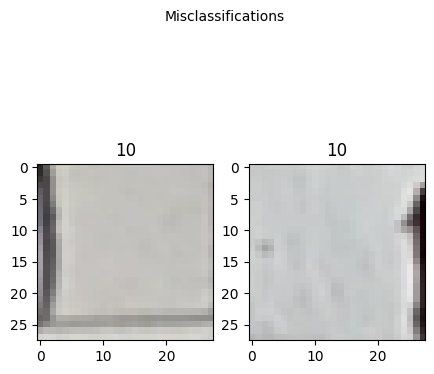

In [14]:
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in wrong_imgs.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [ ]:
# For 2

In [16]:
path = '/home/venkateshiyer/Handwritten_digits_existing/2/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [17]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      1003

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



In [ ]:
# For 3

In [18]:
path = '/home/venkateshiyer/Handwritten_digits_existing/3/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [19]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1003

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



In [ ]:
# For 4

In [20]:
path = '/home/venkateshiyer/Handwritten_digits_existing/4/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [21]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00      1003

    accuracy                           1.00      1003
   macro avg       1.00      1.00      1.00      1003
weighted avg       1.00      1.00      1.00      1003



In [ ]:
# For 5

In [22]:
path = '/home/venkateshiyer/Handwritten_digits_existing/5/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [23]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9990079365079365
              precision    recall  f1-score   support

           5       1.00      1.00      1.00      1008
           6       0.00      0.00      0.00         0

    accuracy                           1.00      1008
   macro avg       0.50      0.50      0.50      1008
weighted avg       1.00      1.00      1.00      1008



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
len(wrong_imgs)
wrong_imgs

{'/home/venkateshiyer/Handwritten_digits_existing/5/63ad93f7-961d-4448-8e65-eb37beca271c_printed.jpg': 6}

Text(0.5, 0.98, 'Misclassifications')

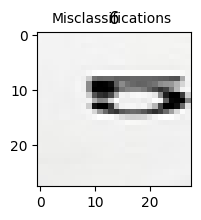

In [26]:
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in wrong_imgs.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [ ]:
# For 6

In [27]:
path = '/home/venkateshiyer/Handwritten_digits_existing/6/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [28]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9990079365079365
              precision    recall  f1-score   support

           6       1.00      1.00      1.00      1008
           8       0.00      0.00      0.00         0

    accuracy                           1.00      1008
   macro avg       0.50      0.50      0.50      1008
weighted avg       1.00      1.00      1.00      1008



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
len(wrong_imgs)
wrong_imgs

{'/home/venkateshiyer/Handwritten_digits_existing/6/42fecdd52bea499e9001a2796692273d__printed.jpg': 8}

Text(0.5, 0.98, 'Misclassifications')

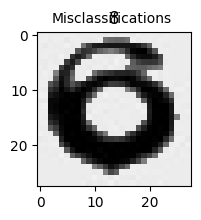

In [30]:
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in wrong_imgs.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [ ]:
# FOr 7

In [31]:
path = '/home/venkateshiyer/Handwritten_digits_existing/7/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [32]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           7       1.00      1.00      1.00      1008

    accuracy                           1.00      1008
   macro avg       1.00      1.00      1.00      1008
weighted avg       1.00      1.00      1.00      1008



In [ ]:
# For 8

In [33]:
path = '/home/venkateshiyer/Handwritten_digits_existing/8/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [34]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           8       1.00      1.00      1.00      1008

    accuracy                           1.00      1008
   macro avg       1.00      1.00      1.00      1008
weighted avg       1.00      1.00      1.00      1008



In [ ]:
# For 9

In [35]:
path = '/home/venkateshiyer/Handwritten_digits_existing/9/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [36]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9990079365079365
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      1008

    accuracy                           1.00      1008
   macro avg       0.50      0.50      0.50      1008
weighted avg       1.00      1.00      1.00      1008



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
len(wrong_imgs)
wrong_imgs

{'/home/venkateshiyer/Handwritten_digits_existing/9/5c34e9e5-cc60-4fcf-bd45-066c98c44422_printed.jpg': 5}

Text(0.5, 0.98, 'Misclassifications')

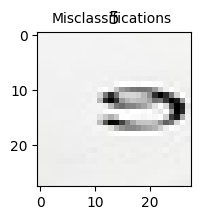

In [38]:
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in wrong_imgs.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)